## Titanic survival prediction

Data Dictionary:

survival - Survival (0 = No; 1 = Yes)
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name - Name
sex - Sex
age - Age
sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fare
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Machine learning library
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

##### import files and print out for first insight

In [2]:
train = pd.read_csv('train.csv')
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
561,562,0,3,"Sivic, Mr. Husein",male,40.00,0,0,349251,7.8958,NaN,S
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.00,1,1,C.A. 33112,36.7500,NaN,S
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.00,0,0,SOTON/O2 3101287,7.9250,NaN,S
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.00,0,0,250648,13.0000,NaN,S


In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# data size
print(f'There are {train.shape[0]} rows in train data set.')
print(f'There are {train.shape[1]} columns in train data set.')
print(f'There are {test.shape[0]} rows in test data set.')
print(f'There are {test.shape[1]} columns in test data set.')


There are 891 rows in train data set.
There are 12 columns in train data set.
There are 418 rows in test data set.
There are 11 columns in test data set.


##### explorer the data types

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#####  DataFrame describe function to gain some overview on data set

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Maisner, Mr. Simon",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


##### import library to show missing value

In [9]:
import missingno as mn

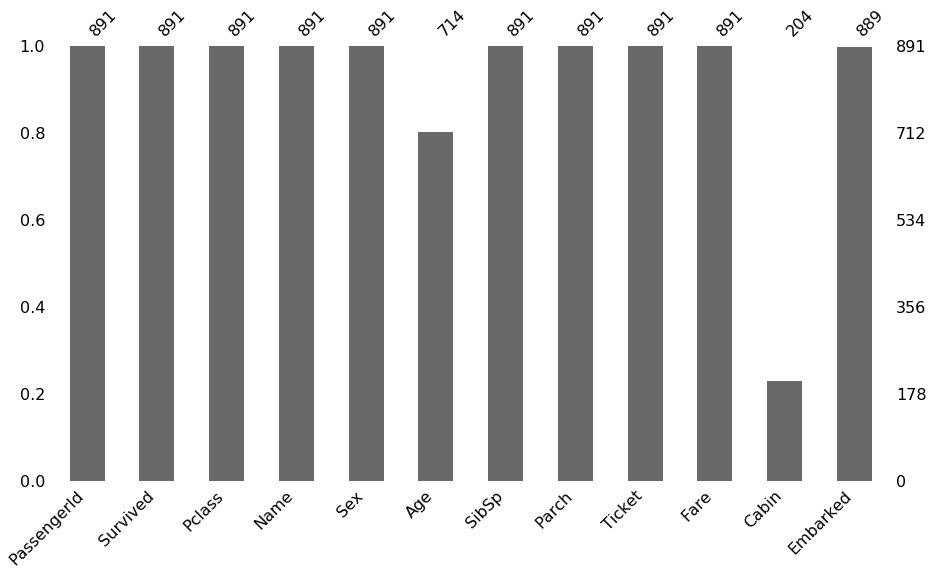

In [10]:
mn.bar(train, figsize=(15,8));

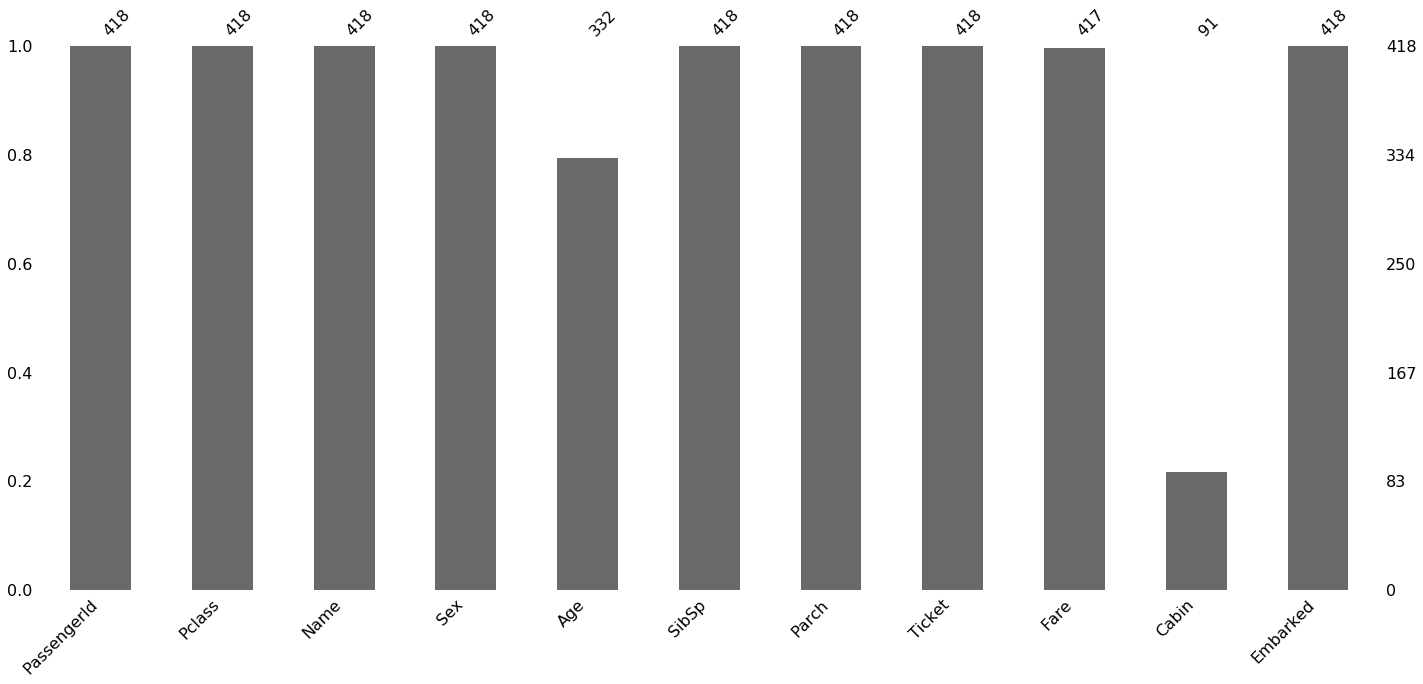

In [11]:
mn.bar(test)

##### function to calculate total number of missing value according to each feature

In [12]:
def missing_ratio(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round(df.isnull().sum().sort_values(ascending=False)/len(df)*100,2)
    return pd.concat([total,percent], axis=1, keys=['Total','Percent'])


In [13]:
missing_ratio(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [14]:
missing_ratio(test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


#### Some plots to visualize the correlation between different data features 

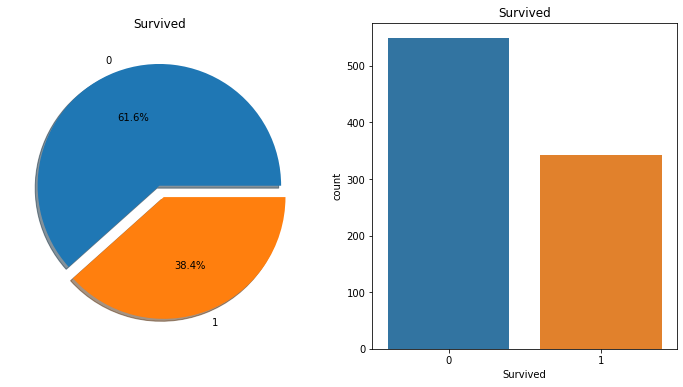

In [15]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
train['Survived'].value_counts().plot.pie(explode = [0,0.1],
                                          autopct = '%1.1f%%',
                                          ax = ax[0],
                                          shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',
              data = train,
              ax = ax[1])
ax[1].set_title('Survived')
plt.show()

In [16]:
# total number of male and female surviver in compare to male and female non surviver
pd.crosstab(train.Sex,train.Survived, margins=True, margins_name='Total')

Survived,0,1,Total
Sex,,,
female,81,233,314
male,468,109,577
Total,549,342,891


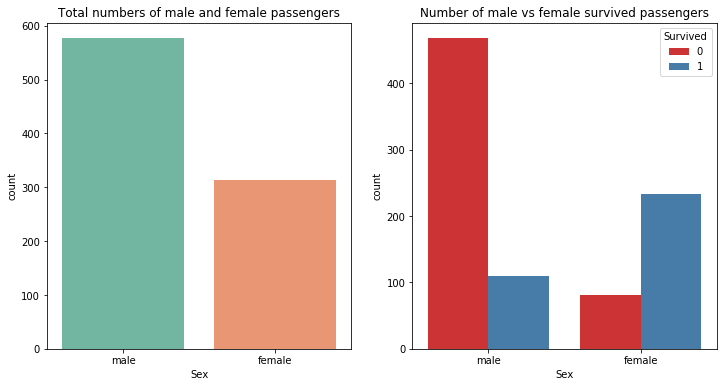

In [17]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('Sex',
              data = train,
              palette = 'Set2',
              ax = ax[0])
ax[0].set_title('Total numbers of male and female passengers')
sns.countplot('Sex',
              data = train,
              hue = 'Survived',
              palette = 'Set1', 
              ax = ax[1])
ax[1].set_title('Number of male vs female survived passengers')
plt.show()

In [18]:
# survival in relation with Pclass
pd.crosstab(train['Pclass'],train['Survived'],margins=True).style.background_gradient()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


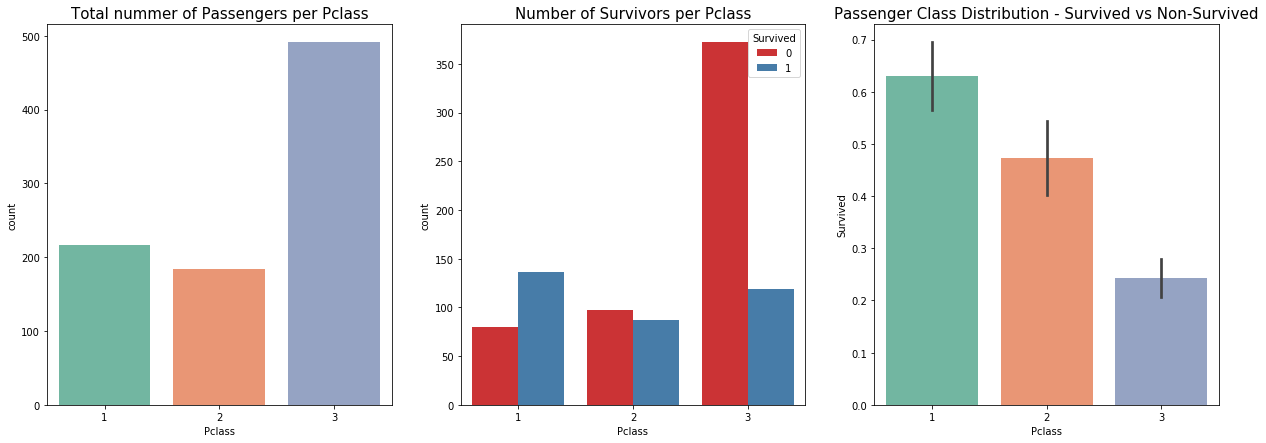

In [19]:
fig,ax=plt.subplots(1,3,figsize=(21,7))
sns.countplot('Pclass', 
              data = train,
              palette = 'Set2', 
              ax = ax[0])
ax[0].set_title('Total nummer of Passengers per Pclass',fontsize = 15)
sns.countplot('Pclass',
              data = train,
              hue = 'Survived',
              palette = 'Set1', 
              ax = ax[1])
ax[1].set_title('Number of Survivors per Pclass',fontsize = 15)
sns.barplot(x = "Pclass", 
            y = "Survived",
            data=train, 
            palette = 'Set2', 
            ax = ax[2])
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 15)
plt.show()

<Figure size 1152x504 with 0 Axes>

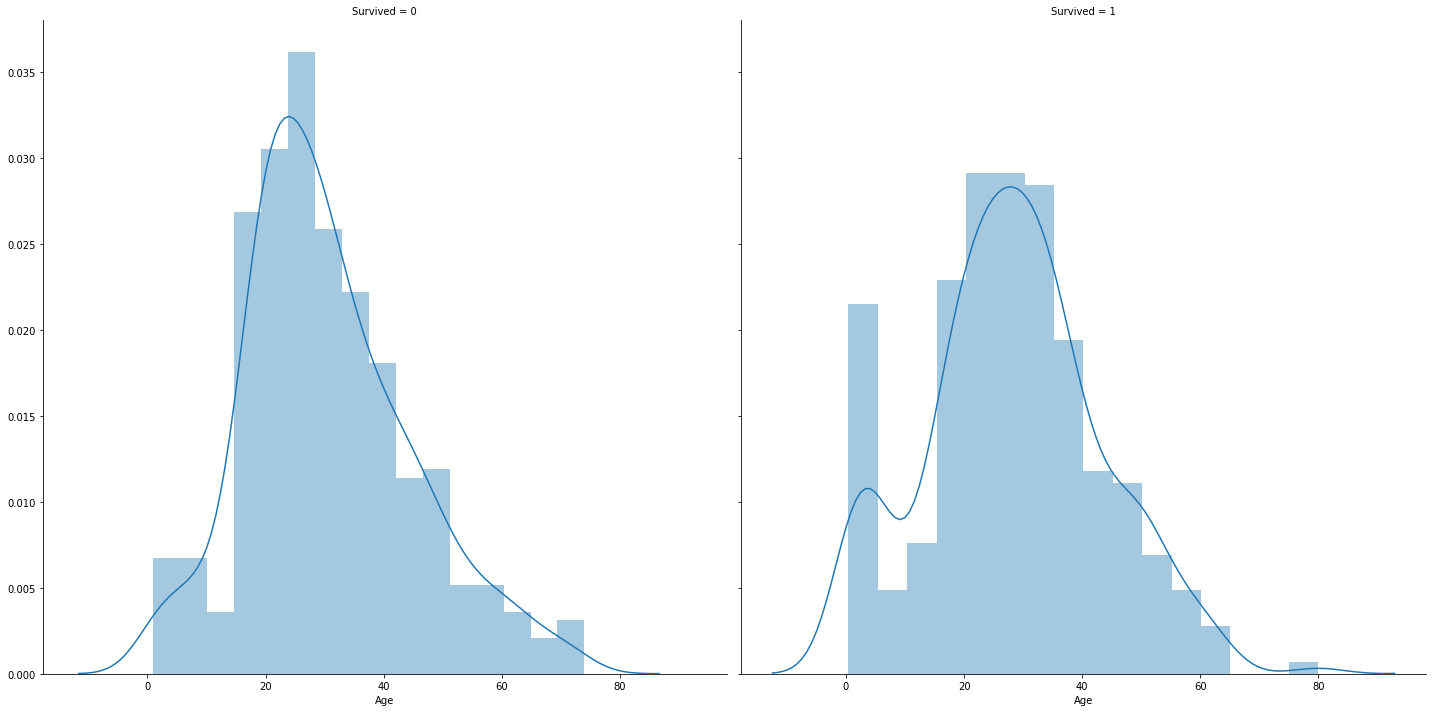

In [20]:
# Explore Age vs Survived
plt.figure(figsize=(16,7))
g = sns.FacetGrid(train, 
                  col = 'Survived',
                  size = 10)
g = g.map(sns.distplot, "Age")
plt.show()

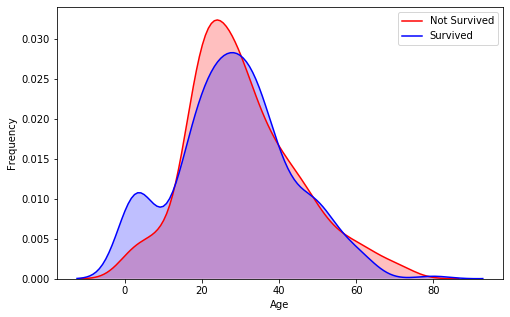

In [21]:
plt.figure(figsize=(8,5))
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], 
                color = "Red",
                shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], 
                ax = g,
                color = "Blue",
                shade = True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

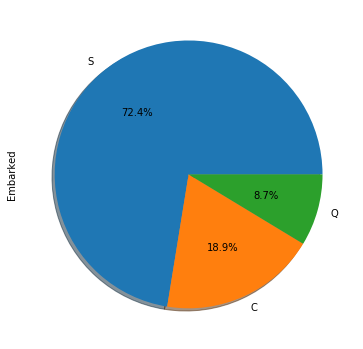

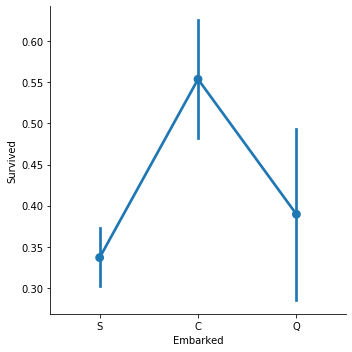

In [22]:
# survival vs Embarked
fig,ax = plt.subplots(1,1,figsize=(6,10))
train['Embarked'].value_counts().plot.pie(autopct = '%1.1f%%',
                                          ax=ax,
                                          shadow = True)

sns.factorplot(x = 'Embarked',
               y = 'Survived',
               data = train)
plt.show()


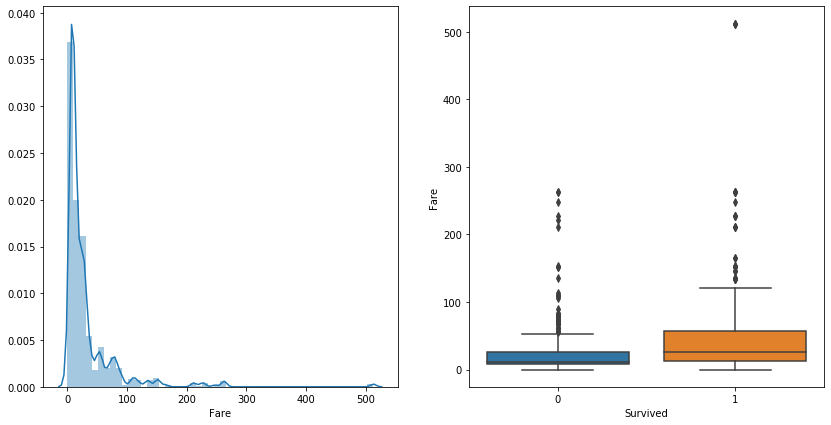

In [23]:
# Fare and survival
fig,ax = plt.subplots(1,2,figsize = (14,7))
sns.distplot(train.Fare, ax = ax[0])
sns.boxplot(train.Survived,
            train.Fare)
plt.show()

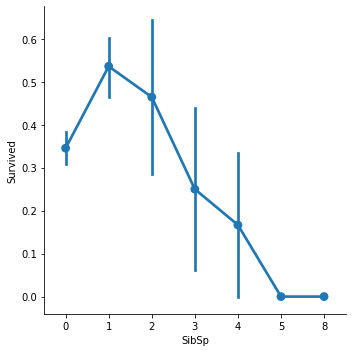

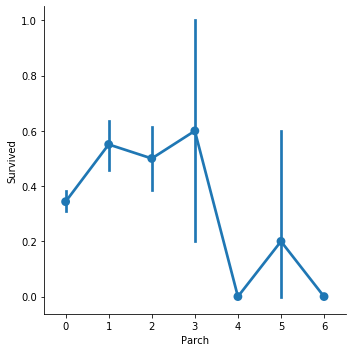

In [24]:
sns.factorplot(x = 'SibSp', y = 'Survived', data = train, ax = ax[0])
sns.factorplot(x = 'Parch', y = 'Survived', data = train, ax = ax[1])
plt.show()

##### Here I will merge the train and test set to get the overview on the whole data, data processing will only be applied on train set to avoid data leakage

In [25]:
df_all=pd.concat([train,test],sort=True).reset_index(drop=True)
df_all

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


##### create new feature 'Family_Size'  

In [26]:
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1

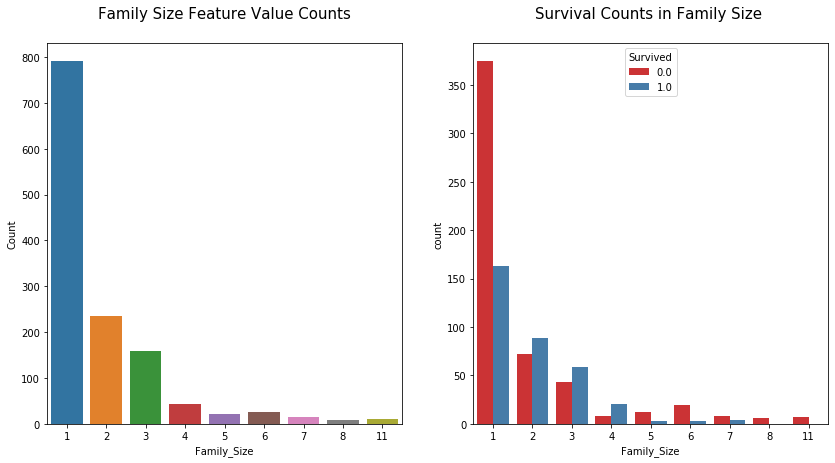

In [27]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

fig, ax = plt.subplots(1,2,figsize=(14, 7))

sns.barplot(x = df_all['Family_Size'].value_counts().index, 
            y = df_all['Family_Size'].value_counts().values, 
            ax=ax[0])
sns.countplot(x='Family_Size', 
              hue='Survived', 
              data=df_all,
              palette = 'Set1',
              ax=ax[1])
ax[0].set_title('Family Size Feature Value Counts', size=15, y=1.05)
ax[0].set_xlabel('Family_Size')
ax[0].set_ylabel('Count')
ax[1].set_title('Survival Counts in Family Size ', size=15, y=1.05)
plt.show()

In [28]:
# group the Families to 3 groups different sizes
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Large', 6: 'Large', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

In [29]:
train['Family_Size_Grouped'] =train['Family_Size'].map(family_map)
test['Family_Size_Grouped'] =test['Family_Size'].map(family_map)

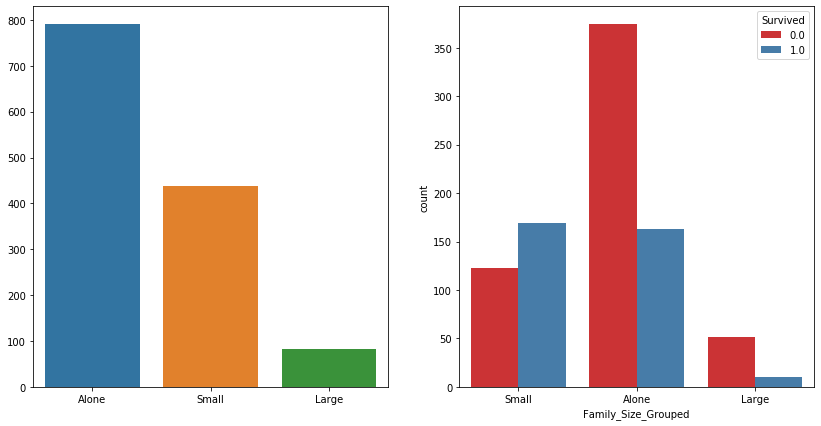

In [30]:
fig, ax = plt.subplots(1,2,figsize=(14, 7))

sns.barplot(x = df_all['Family_Size_Grouped'].value_counts().index, 
            y = df_all['Family_Size_Grouped'].value_counts().values, 
            ax=ax[0])
sns.countplot(x='Family_Size_Grouped', 
              hue='Survived', 
              data=df_all, 
              palette = 'Set1',
              ax=ax[1]);

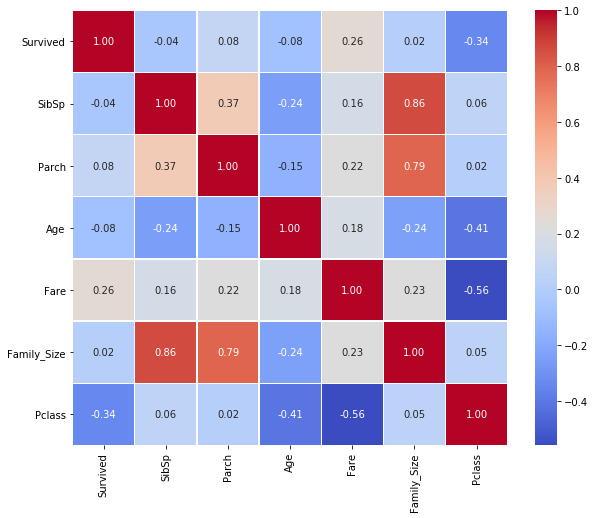

In [31]:
corr = df_all[["Survived","SibSp","Parch","Age","Fare",'Family_Size','Pclass']].corr()
sns.heatmap(corr,
            annot=True, 
            fmt = ".2f", 
            cmap = "coolwarm",
            linewidths=0.2,
            linecolor='white',
            square=True)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

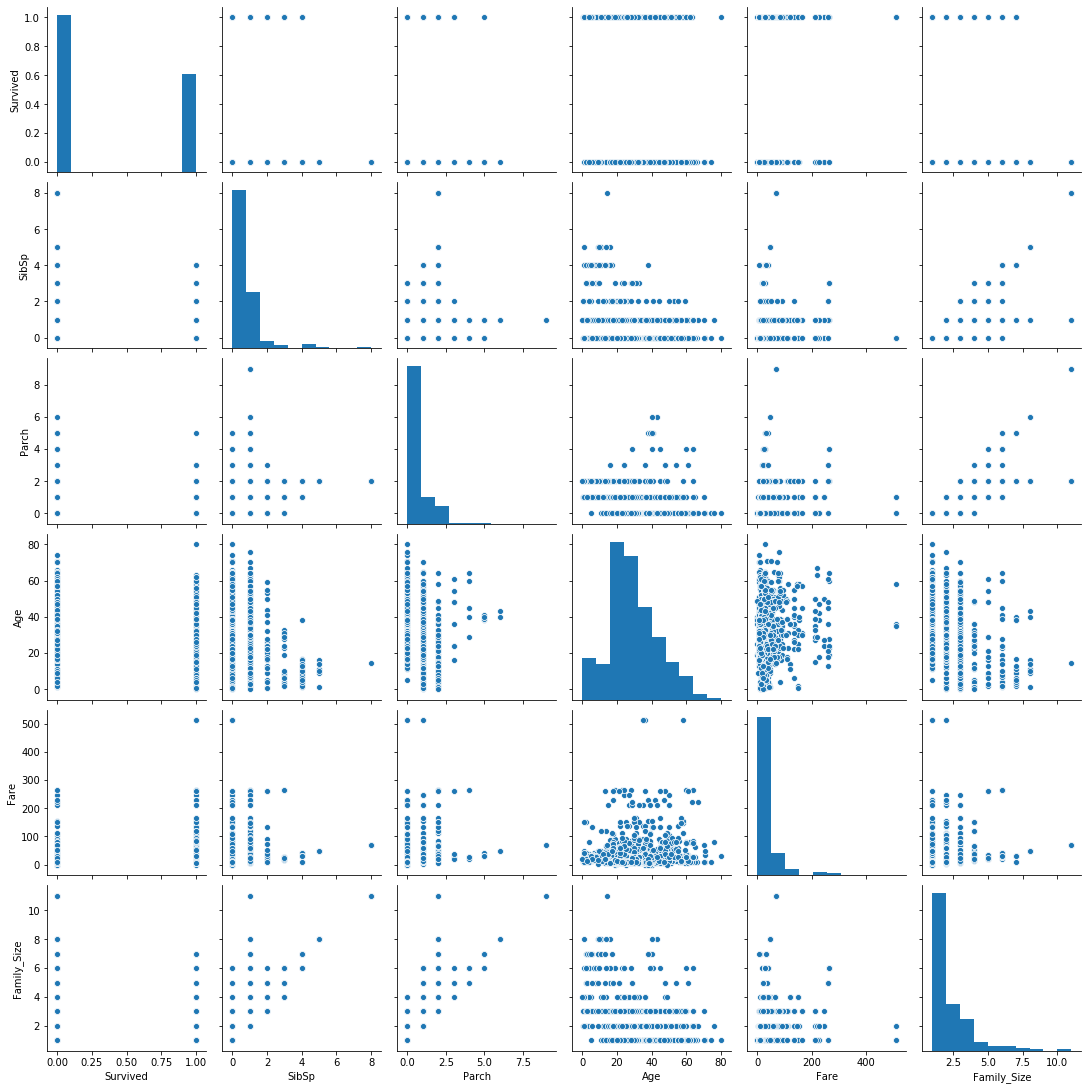

In [32]:
#correlation of each feature to survival
sns.pairplot(df_all[["Survived","SibSp","Parch","Age","Fare",'Family_Size']]);

In [33]:
train.groupby(['Pclass','Family_Size'])['Fare'].mean()

Pclass  Family_Size
1       1               63.672514
        2               91.848039
        3               95.681075
        4              133.521429
        5              262.375000
        6              263.000000
2       1               14.066106
        2               24.682962
        3               31.693819
        4               36.575969
        5               23.000000
        6               18.750000
3       1                9.272052
        2               13.410023
        3               16.378277
        4               20.103689
        5               26.972233
        6               32.420588
        7               29.366667
        8               46.900000
        11              69.550000
Name: Fare, dtype: float64

In [34]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,1,Alone


##### there is one missing value in Fare in test set, I decide to impute the missing value with the mean of Pclass as computed above

In [35]:
test['Fare'].fillna(value=9.270,inplace=True)


In [36]:
test.Fare.isnull().sum()

0

In [37]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,Alone
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,Alone


##### impute missing Embarked value with mode value

In [38]:
train.Embarked.fillna(value= train.Embarked.mode()[0] , inplace=True)
train.Embarked.isnull().any()

False

In [39]:
#lets extract the Title
df_all['Title'] = df_all.Name.str.extract('([A-Za-z]+)\.') 
train['Title'] = train.Name.str.extract('([A-Za-z]+)\.') 
test['Title'] = test.Name.str.extract('([A-Za-z]+)\.') 
#Checking the Titles with the Sex
pd.crosstab(df_all.Title,df_all.Sex, margins = True).T.style.background_gradient(cmap='summer_r') 

Title,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,466
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,843
All,1,4,1,1,1,8,1,1,2,61,260,2,1,757,197,2,8,1,1309


In [40]:
df_all.Title.isnull().sum()

0

In [41]:
df_all.loc[(train.Name.str.contains('Dr\.')) & (df_all.Sex == 'female'),'Title']

796    Dr
Name: Title, dtype: object

In [42]:
train.loc[(train.Name.str.contains('Dr\.')) & (train.Sex == 'female'),'Title'] ='Mrs'

In [43]:
train.loc[796]

PassengerId                                    797
Survived                                         1
Pclass                                           1
Name                   Leader, Dr. Alice (Farnham)
Sex                                         female
Age                                             49
SibSp                                            0
Parch                                            0
Ticket                                       17465
Fare                                       25.9292
Cabin                                          D17
Embarked                                         S
Family_Size                                      1
Family_Size_Grouped                          Alone
Title                                          Mrs
Name: 796, dtype: object

In [44]:
train['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'],inplace=True)
test['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'],inplace=True)

In [45]:
 #lets check the average age by Titles
train.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.699755
Mrs       36.099099
Other     45.888889
Name: Age, dtype: float64

In [46]:
# Assigning the NaN values with the values of the mean ages
for data in [train,test]:
    data.loc[(data.Age.isnull())&(data.Title=='Master'),'Age'] = 4.5
    data.loc[(data.Age.isnull())&(data.Title=='Miss'),'Age'] = 22
    data.loc[(data.Age.isnull())&(data.Title=='Mr'),'Age'] = 32.5
    data.loc[(data.Age.isnull())&(data.Title=='Mrs'),'Age'] = 36
    data.loc[(data.Age.isnull())&(data.Title=='Other'),'Age'] = 46

In [47]:
train.Age.isnull().sum()

0

In [48]:
test.Age.isnull().sum()

0

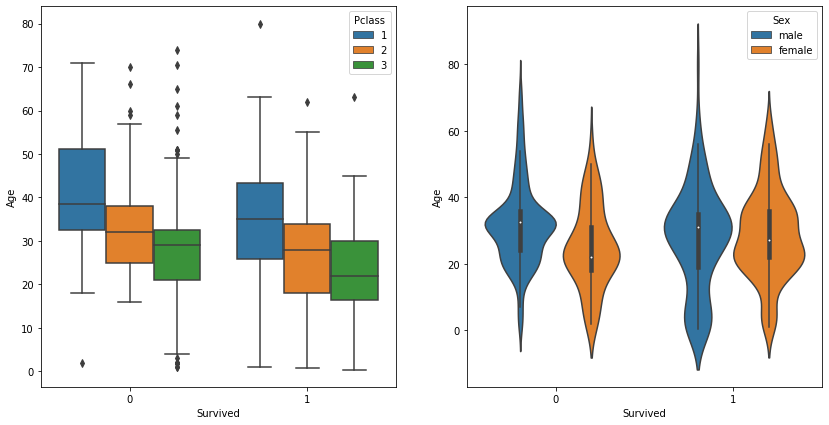

In [49]:
fig,ax = plt.subplots(1,2,figsize = (14,7))
sns.boxplot(train.Survived, 
               train.Age, 
               hue=train.Pclass, 
               ax = ax[0])
sns.violinplot(train.Survived,
            train.Age,
            hue=train.Sex)
plt.show()

In [50]:
train.drop(['Name','Parch','SibSp','Family_Size','Cabin','Ticket','PassengerId'], axis=1, inplace=True)
test.drop(['Name','Parch','SibSp','Family_Size','Cabin','Ticket','PassengerId'], axis=1, inplace=True)

In [51]:
train[['Age','Embarked','Fare','Pclass','Sex','Title','Family_Size_Grouped']].isnull().any()

Age                    False
Embarked               False
Fare                   False
Pclass                 False
Sex                    False
Title                  False
Family_Size_Grouped    False
dtype: bool

In [52]:
test[['Age','Embarked','Fare','Pclass','Sex','Title','Family_Size_Grouped']].isnull().any()

Age                    False
Embarked               False
Fare                   False
Pclass                 False
Sex                    False
Title                  False
Family_Size_Grouped    False
dtype: bool

In [53]:
for feature in ['Embarked','Sex','Title','Family_Size_Grouped']:
    train[feature] = train[feature].astype("category")
    test[feature] = test[feature].astype("category")
    train = pd.get_dummies(train, columns = [feature],drop_first=True) 
    test = pd.get_dummies(test, columns = [feature],drop_first=True) 

In [54]:
print(train.Age.min())
print(train.Age.max())
print(test.Age.min())
print(test.Age.max())

0.42
80.0
0.17
76.0


##### continuous features should be now transformed to categorial features for further processing

In [55]:
train['AgeBin'] = pd.cut(train['Age'],  bins=[0.0, 22.0,30.0, 36.0,80.0])

In [56]:
test['AgeBin'] = pd.cut(test['Age'], bins=[0.0, 22.0,30.0, 36.0,80.0])

In [57]:
label = LabelEncoder()
train['AgeBin_Code'] = label.fit_transform(train['AgeBin'])
test['AgeBin_Code'] = label.transform(test['AgeBin'])

In [58]:
print(train.Fare.min())
print(train.Fare.max())
print(test.Fare.min())
print(test.Fare.max())

0.0
512.3292
0.0
512.3292


In [59]:
train['FareBin'] = pd.qcut(train['Fare'], 5)


In [60]:
train.FareBin.unique()

[(-0.001, 7.854], (39.688, 512.329], (7.854, 10.5], (10.5, 21.679], (21.679, 39.688]]
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [61]:
test['FareBin'] = pd.cut(test['Fare'], bins=[-0.001,7.854, 10.5,21.679, 39.688, 512.3292])

In [62]:
test

,Pclass,Age,Fare,Embarked_Q,Embarked_S,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Family_Size_Grouped_Large,Family_Size_Grouped_Small,AgeBin,AgeBin_Code,FareBin
0,3,34.5,7.8292,1,0,1,0,1,0,0,0,0,"(30.0, 36.0]",2,"(-0.001, 7.854]"
1,3,47.0,7.0000,0,1,0,0,0,1,0,0,1,"(36.0, 80.0]",3,"(-0.001, 7.854]"
2,2,62.0,9.6875,1,0,1,0,1,0,0,0,0,"(36.0, 80.0]",3,"(7.854, 10.5]"
3,3,27.0,8.6625,0,1,1,0,1,0,0,0,0,"(22.0, 30.0]",1,"(7.854, 10.5]"
4,3,22.0,12.2875,0,1,0,0,0,1,0,0,1,"(0.0, 22.0]",0,"(10.5, 21.679]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,32.5,8.0500,0,1,1,0,1,0,0,0,0,"(30.0, 36.0]",2,"(7.854, 10.5]"
414,1,39.0,108.9000,0,0,0,0,0,1,0,0,0,"(36.0, 80.0]",3,"(39.688, 512.329]"
415,3,38.5,7.2500,0,1,1,0,1,0,0,0,0,"(36.0, 80.0]",3,"(-0.001, 7.854]"
416,3,32.5,8.0500,0,1,1,0,1,0,0,0,0,"(30.0, 36.0]",2,"(7.854, 10.5]"


In [63]:
label = LabelEncoder()
train['FareBin_Code'] = label.fit_transform(train['FareBin'])

In [64]:
test['FareBin_Code'] = label.transform(test['FareBin'])

In [65]:
#now delete unnecessary features
train.drop(['Age','Fare','AgeBin','FareBin'],axis=1,inplace=True)
test.drop(['Age','Fare','AgeBin','FareBin'],axis=1,inplace=True)


In [66]:
predictors = train.drop(['Survived'], axis=1)
target = train["Survived"]

In [67]:
# ready to train
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 0)

In [68]:
models = {'SGDClassifier': SGDClassifier(),'GradientBoostingClassifier':GradientBoostingClassifier(),
          'KNeighborsClassifier':KNeighborsClassifier(),'RandomForestClassifier':RandomForestClassifier(),
          'DecisionTreeClassifier':DecisionTreeClassifier(),'Perceptron':Perceptron(),'SVC':SVC(),
          'LinearSVC':LinearSVC(), 'LogisticRegression':LogisticRegression(),'GaussianNB':GaussianNB()}
Models=[]
Scores=[]
Mean_Scores =[]
for model_name in models:
    model = models[model_name]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    acc = round(accuracy_score(y_pred, y_val) * 100, 2)
    cv_score= model_selection.cross_val_score(model, x_train,y_train, cv=10)
    
    Models.append(model_name)
    Scores.append(acc)
    Mean_Scores.append(cv_score.mean())


In [69]:
models_df = pd.DataFrame({'Model': Models,'Score': Scores,'Mean_Score' :Mean_Scores})
models_df.sort_values(by='Mean_Score', ascending=False)

,Model,Score,Mean_Score
6,SVC,82.68,0.834351
8,LogisticRegression,82.12,0.832923
7,LinearSVC,82.68,0.828736
1,GradientBoostingClassifier,83.24,0.821714
3,RandomForestClassifier,84.36,0.799237
2,KNeighborsClassifier,84.36,0.796401
4,DecisionTreeClassifier,84.36,0.787989
9,GaussianNB,81.01,0.780047
0,SGDClassifier,81.56,0.772770
5,Perceptron,69.27,0.745931


### Best model is SVC with 83.43 % , followed by LogisticRegrestion only a little worse